# Heart Failure Prediction Dataset

#### Información

Estudio realizado por: Stanislav Korotchenko, Pepe Aguilar van de Hofstadt y Jesús Jornet Ortí.

### Origen de los datos

Datos extraídos de Kaggle https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

### Contexto

Las enfermedades cardiovasculares (ECV) son la primera causa de muerte en el mundo: se calcula que cada año mueren 17,9 millones de personas, lo que representa el 31% de todas las muertes en el mundo. Cuatro de cada cinco muertes por ECV se deben a infartos de miocardio y accidentes cerebrovasculares, y un tercio de estas muertes se producen prematuramente en personas menores de 70 años. La insuficiencia cardiaca es un evento común causado por las ECV y este conjunto de datos contiene 11 características que pueden utilizarse para predecir una posible enfermedad cardiaca.

Las personas con enfermedades cardiovasculares o que corren un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y gestión tempranas en las que un modelo de aprendizaje automático puede ser de gran ayuda.

### Fuente

Este dataset se creó combinando diferentes datasets que ya estaban disponibles de forma independiente pero que no se habían combinado antes. En este dataset se combinan 5 datasets sobre el corazón con 11 características comunes, lo que lo convierte en el mayor dataset sobre enfermedades cardiacas disponible hasta la fecha para fines de investigación. Los cinco datasets utilizados para su elaboración son:
- Cleveland: 303 observaciones
- Hungría: 294 observaciones
- Suiza: 123 observaciones
- Long Beach VA: 200 observaciones
- Dataset Stalog (corazón): 270 observaciones

Total: 1190 observaciones
Duplicadas 272 observaciones

Dataset final: 918 observaciones

Todos los datasets utilizados pueden encontrarse en el índice de conjuntos de datos sobre enfermedades cardíacas del repositorio de aprendizaje automático de la UCI en el siguiente enlace: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

### Descripción de los datos

Los datos utilizados son:
- **Age:** edad del paciente [años]
- **Sex:** sexo del paciente [M: masculino, F: femenino]
- **ChestPainType:** tipo de dolor de pecho [TA: Angina típica, ATA: Angina atípica, NAP: Dolor no anginal, ASY: Asintomático]
RestingBP: tensión arterial en reposo [mm Hg]
- **Cholesterol:** colesterol sérico [mm/dl]
- **FastingBS:** azúcar en sangre en ayunas [1: si FastingBS > 120 mg/dl, 0: en caso contrario]
- **RestingECG:** resultados del electrocardiograma en reposo [Normal: Normal, ST: con anomalía de la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST de > 0,05 mV), LVH: que muestra hipertrofia ventricular izquierda probable o definida según los criterios de Estes]
- **MaxHR:** Frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]
- **ExerciseAngina:** Angina inducida por el ejercicio [Y: Sí, N: No]
- **Oldpeak:** oldpeak = ST [Valor numérico medido en depresión]
- **ST_Slope:** la pendiente del pico del segmento ST de ejercicio [Up: pendiente ascendente, Flat: plana, Down: pendiente descendiente]
- **HeartDisease:** clase de salida [1: cardiopatía, 0: Normal]

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from numpy.lib.function_base import corrcoef
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import matplotlib.patches as mpatches
from scipy import stats
from scipy.stats import norm
from scipy import integrate
from distfit import distfit
from scipy.stats import shapiro
from scipy.stats import levene
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols




In [7]:
#pip install --upgrade nbformat


In [8]:
#pip install distfit

In [9]:
file_path = 'heart.csv'

heart = pd.read_csv(file_path)

heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Elección de datos y breve de scripción de su naturaleza

In [10]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Tenemos un dataframe de pandas con 918 entradas numeradas del 0 al 917. Es decir, 918 filas, con 12 columnas.

Cada columna cuenta con 918 valores no nulos. No hay valores que falten en el conjunto de datos y estos valores están en números flotantes (1 columna), números enteros (6 columna) y objetos (5 columnas)

Uso de memoria: utiliza aproximadamente 86.2 KB de memoria.

Resumiendo, el conjunto de datos contiene 918 filas y 12 columnas sin valores faltantes. Los tipos de datos son adecuados para su análisis ya que están completos y adecuadamente tipificados.

In [11]:
heart.isna().mean()

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

Aquí vemos que no hay valores faltantes en nuestro dataframe.

#### Duplicados

In [12]:
heart.duplicated().agg(['sum','mean'])

sum     0.0
mean    0.0
dtype: float64

No tenemos valores duplicados.

## Variables numericas

In [13]:
heart_n = heart.drop(["FastingBS", "HeartDisease"], axis=1)

In [14]:
display(heart_n.describe())

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


- **Edad**(Age): Van desde los 28 hasta los 77 años, con una edad media de 53.5 años. Esto sugiere una muestra adulta con una buena distribución de edades.
- **Presión Arterial en Reposo** (RestingBP): La presión arterial varía entre 0 y 200. El valor mínimo de 0 podría ser un error o un valor faltante codificado, ya que es poco probable que sea una medida fisiológicamente plausible.
- **Colesterol** (Cholesterol): Los niveles de colesterol van de 0 a 603, con una media de aproximadamente 198.8. Al igual que con la presión arterial, los valores de colesterol de 0 podrían ser inexactos o representar datos faltantes.
- **Máxima Frecuencia Cardíaca Alcanzada** (MaxHR): Varía de 60 a 202, lo cual parece razonable y muestra la capacidad cardiovascular de los participantes durante el ejercicio.
- **Depresión del ST** inducida por el ejercicio en relación con el reposo (Oldpeak): Varía de -2.6 a 6.2, lo cual es interesante ya que normalmente no esperarías valores negativos. Esto podría necesitar una revisión adicional para entender el contexto de estos valores.

### Gráfico de distribución de edades

En el caso particular de la variable de edad 'Age', **la mediana se sitúa en los 54 años.** La caja muestra un **IQR relativamente simétrico**, lo que indica una **distribución homogénea de las edades alrededor de la mediana**. No obstante, **la presencia de puntos por encima y por debajo de los 'bigotes' sugiere la existencia de valores atípicos** tanto en la población más joven como en la más anciana.

In [15]:
fig = px.box(heart, y=["Age"])


fig.update_traces(boxpoints='all', jitter=0.3, pointpos=-1.8)

fig.update_layout(title="Distribución de Edad", title_x=0.5)

fig.show()

### Gráfico de densidad de edades con media

Este gráfico muestra la distribución de las edades de los individuos en nuestro conjunto de datos. La curva suave representa la densidad de probabilidad de las edades, con la línea roja punteada indicando la media de las edades 53,51 años.

La línea azul representa la distribución normal para comparar la distribución observada con una normal teórica. Esto nos ayuda a evaluar cómo se ajusta nuestra distribución de edades a un modelo ideal.

El gráfico proporciona una visión clara y concisa de la distribución de edades en nuestro conjunto de datos, lo que es fundamental para comprender la composición demográfica de nuestra muestra y para futuros análisis sobre el impacto de la edad en otras variables de interés.

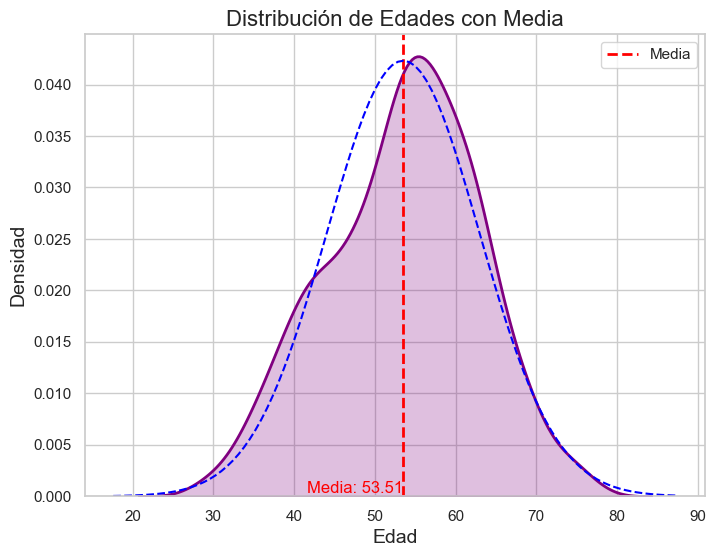

In [16]:
mean_age, desviacion_estandar = norm.fit(heart["Age"])

# Configuración de estilo usando Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(8, 6))
sns.kdeplot(data=heart["Age"], fill=True, color='purple', linewidth=2)

# Agregar línea vertical en la media
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Media')

plt.text(mean_age, 0, f'Media: {mean_age:.2f}', color='red', verticalalignment='bottom', horizontalalignment='right')

# Configuraciones adicionales para mejorar la estética
plt.title("Distribución de Edades con Media", fontsize=16)
plt.xlabel("Edad", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.legend()  # Mostrar leyenda con la línea de la media

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_age, desviacion_estandar)
plt.plot(x, p, color='blue', linestyle='--', label='Norm')

plt.show()

In [17]:
media, desviacion_estandar = norm.fit(heart["Age"])

# Crear una función de densidad de probabilidad para la distribución ajustada
pdf_func = norm.pdf

# Calcular la probabilidad de que la edad sea menor de 45
probabilidad_menor_45 = integrate.quad(pdf_func, -float('inf'), 45, args=(media, desviacion_estandar))[0]
probabilidad_menor_65 = integrate.quad(pdf_func, -float('inf'), 65, args=(media, desviacion_estandar))[0]
probabilidad_menor_53 = integrate.quad(pdf_func, -float('inf'), 53, args=(media, desviacion_estandar))[0]

print(f"La probabilidad de que la edad sea menor de 45 es: {round(probabilidad_menor_45, 3)} %")
print(f"La probabilidad de que la edad sea mayor de 65 es: {round(1-probabilidad_menor_65, 3)} %")
print(f"La probabilidad de que la edad sea menor de 53 es: {round(1-probabilidad_menor_53, 3)} %")

La probabilidad de que la edad sea menor de 45 es: 0.183 %
La probabilidad de que la edad sea mayor de 65 es: 0.111 %
La probabilidad de que la edad sea menor de 53 es: 0.522 %


### Gráfico de Presión Arterial en Reposo

- **Mediana:** La presión arterial en reposo tiene una mediana de 130 mm Hg.
- **Rango Interquartílico (IQR):** La presión arterial en reposo varía desde 120 mm Hg hasta 140 mm Hg.
- **Valores Atípicos:** Se observan valores atípicos más allá de los "bigotes" del diagrama, indicando la presencia de individuos con niveles anormales de presión arterial.

Este gráfico proporciona una visión rápida de la distribución de la presión arterial en reposo en nuestra muestra, lo que ayuda a identificar posibles anomalías o tendencias en los niveles de presión arterial de los individuos estudiados.

In [18]:
fig = px.box(heart, y=["RestingBP"])


fig.update_traces(boxpoints='all', jitter=0.3, pointpos=-1.8)

fig.update_layout(title="Resting blood pressure", title_x=0.5)

fig.show()

### Presión arterial en reposo

- **Media de Presión Arterial en Reposo:** La línea vertical punteada negra representa la media de la presión arterial en reposo, que es de aproximadamente 132,40 mm Hg.
La curva de densidad roja ilustra la distribución de la presión arterial en reposo en la muestra de datos. Mientras tanto, la línea azul punteada representa una distribución normal teórica con la misma media y desviación estándar que la distribución de presión arterial en reposo observada.

Nos permite visualizar la distribución de la presión arterial en reposo en nuestra muestra, así como la ubicación de la media dentro de esa distribución. Con esto vemos la tendencia central de la presión arterial en reposo y su variabilidad en la población estudiada.

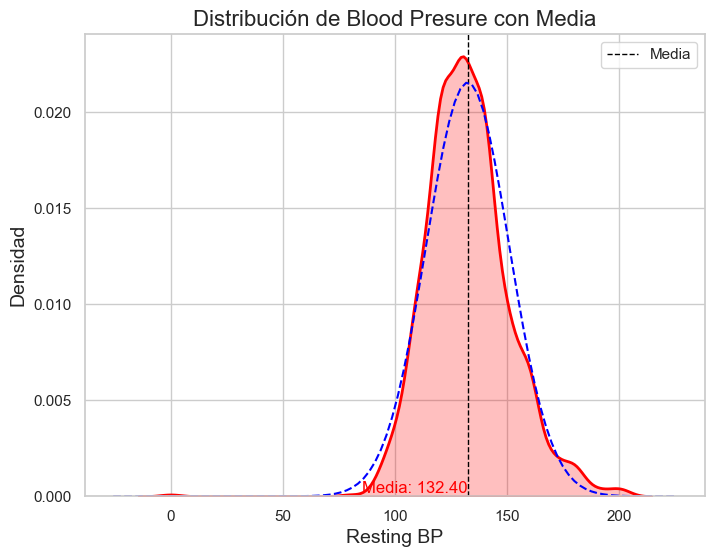

In [19]:
mean_blood, desviacion_estandar = norm.fit(heart["RestingBP"])

# Configuración de estilo usando Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(8, 6))
sns.kdeplot(data=heart["RestingBP"], fill=True, color='red', linewidth=2)

# Agregar línea vertical en la media
plt.axvline(mean_blood, color='black', linestyle='dashed', linewidth=1, label='Media')

plt.text(mean_blood, 0, f'Media: {mean_blood:.2f}', color='red', verticalalignment='bottom', horizontalalignment='right')

# Configuraciones adicionales para mejorar la estética
plt.title("Distribución de presión en sangre", fontsize=16)
plt.xlabel("Presión en sangre", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.legend()  

# Configuraciones adicionales para mejorar la estética
plt.title("Distribución de Blood Presure con Media", fontsize=16)
plt.xlabel("Resting BP", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.legend()  # Mostrar leyenda con la línea de la media

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_blood, desviacion_estandar)
plt.plot(x, p, color='blue', linestyle='--', label='Norm')

plt.show()

### Categorías de presión arterial según la American Heart Association

Según las categorías de presión arterial establecidas por la American Heart Association, hemos calculado las probabilidades correspondientes a diferentes rangos de presión arterial en reposo:

- **Presión Arterial Normal:** La probabilidad de que la presión arterial en reposo esté en el rango normal (menos de 120 mm Hg) es del 25.14%.
- **Presión Arterial Elevada:** La probabilidad de que la presión arterial en reposo esté en el rango elevado (entre 120 y 129 mm Hg) es del 17.57%.
- **Presión Arterial Muy Elevada (Etapa 1):** La probabilidad de que la presión arterial en reposo esté en el rango de etapa 1 de hipertensión (entre 130 y 139 mm Hg) es del 21.22%.
- **Presión Arterial Muy Elevada (Etapa 2):** La probabilidad de que la presión arterial en reposo esté en el rango de etapa 2 de hipertensión (140 mm Hg o más) es del 35.55%.
- **Crisis Total de Presión Arterial:** La probabilidad de que la presión arterial en reposo esté en una situación de crisis total (180 mm Hg o más) es del 0.5%.



In [20]:
media, desviacion_estandar = norm.fit(heart["RestingBP"])

# Crear una función de densidad de probabilidad para la distribución ajustada
pdf_func = norm.pdf


probabilidad_menor_120 = integrate.quad(pdf_func, -float('inf'), 120, args=(media, desviacion_estandar))[0]
probabilidad_menor_129 = integrate.quad(pdf_func, -float('inf'), 129, args=(media, desviacion_estandar))[0]
probabilidad_menor_139 = integrate.quad(pdf_func, -float('inf'), 139, args=(media, desviacion_estandar))[0]
probabilidad_menor_180 = integrate.quad(pdf_func, -float('inf'), 180, args=(media, desviacion_estandar))[0]

display("Segun American Heart Association, blood pressure categories:")
print(f"La probabilidad de que la blood preasure sea normal: {round(probabilidad_menor_120 * 100, 2)} %")
print(f"La probabilidad de que la blood preasure sea elevado: {round((probabilidad_menor_129-probabilidad_menor_120) * 100, 2)} %")
print(f"La probabilidad de que la blood preasure sea muy elevado stage 1: {round((probabilidad_menor_139-probabilidad_menor_129) * 100, 2)} %")
print(f"La probabilidad de que la blood preasure sea muy elevado stage 2: {round((probabilidad_menor_180-probabilidad_menor_139) * 100, 2)} %")
print(f"La probabilidad de que la blood preasure sea CRISIS TOTAL: {round((1-probabilidad_menor_180) * 100, 2)} %")

'Segun American Heart Association, blood pressure categories:'

La probabilidad de que la blood preasure sea normal: 25.14 %
La probabilidad de que la blood preasure sea elevado: 17.57 %
La probabilidad de que la blood preasure sea muy elevado stage 1: 21.22 %
La probabilidad de que la blood preasure sea muy elevado stage 2: 35.55 %
La probabilidad de que la blood preasure sea CRISIS TOTAL: 0.5 %


### Tipo de distribución

El gráfico muestra la distribución de la presión arterial en reposo en tu conjunto de datos ajustada a diferentes distribuciones estadísticas. Después del ajuste, se identificó que la distribución que mejor se ajusta a los datos es la distribución Dweibull.

Los parámetros estimados para esta distribución son:

- Parámetro de ubicación (loc): 132.694
- Parámetro de escala (scale): 15.177

Esto significa que la presión arterial en reposo sigue una distribución Dweibull con una ubicación media de 132.694 mm Hg y una dispersión determinada por el parámetro de escala.

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00151499] [loc=132.397 scale=18.504]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0049447] [loc=0.000 scale=132.397]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.0049447] [loc=-17179869184.000 scale=17179869184.000]
[distfit] >INFO> [dweibull  ] [0.00 sec] [RSS: 0.00128327] [loc=132.694 scale=15.177]
[distfit] >INFO> [t         ] [0.08 sec] [RSS: 0.00151499] [loc=132.396 scale=18.504]
[distfit] >INFO> [genextreme] [0.06 sec] [RSS: 0.00408129] [loc=20.086 scale=131.509]
[distfit] >INFO> [gamma     ] [0.01 sec] [RSS: 0.00149842] [loc=-285.125 scale=0.830]
[distfit] >INFO> [lognorm   ] [0.03 sec] [RSS: 0.00150319] [loc=-880.204 scale=1012.432]
[distfit] >INFO> [beta      ] [0.02 sec] [RSS: 0.00150537] [loc=-654.815 scale=15154.992]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.00421634] [loc=0.000 scale=200.000]
[distfit] >INFO> [loggamma  ] [0.01 sec] [RSS: 0.0015247] [loc=-5826.42

dweibull
(1.2376950367628754, 132.69399000513766, 15.176901053781034)


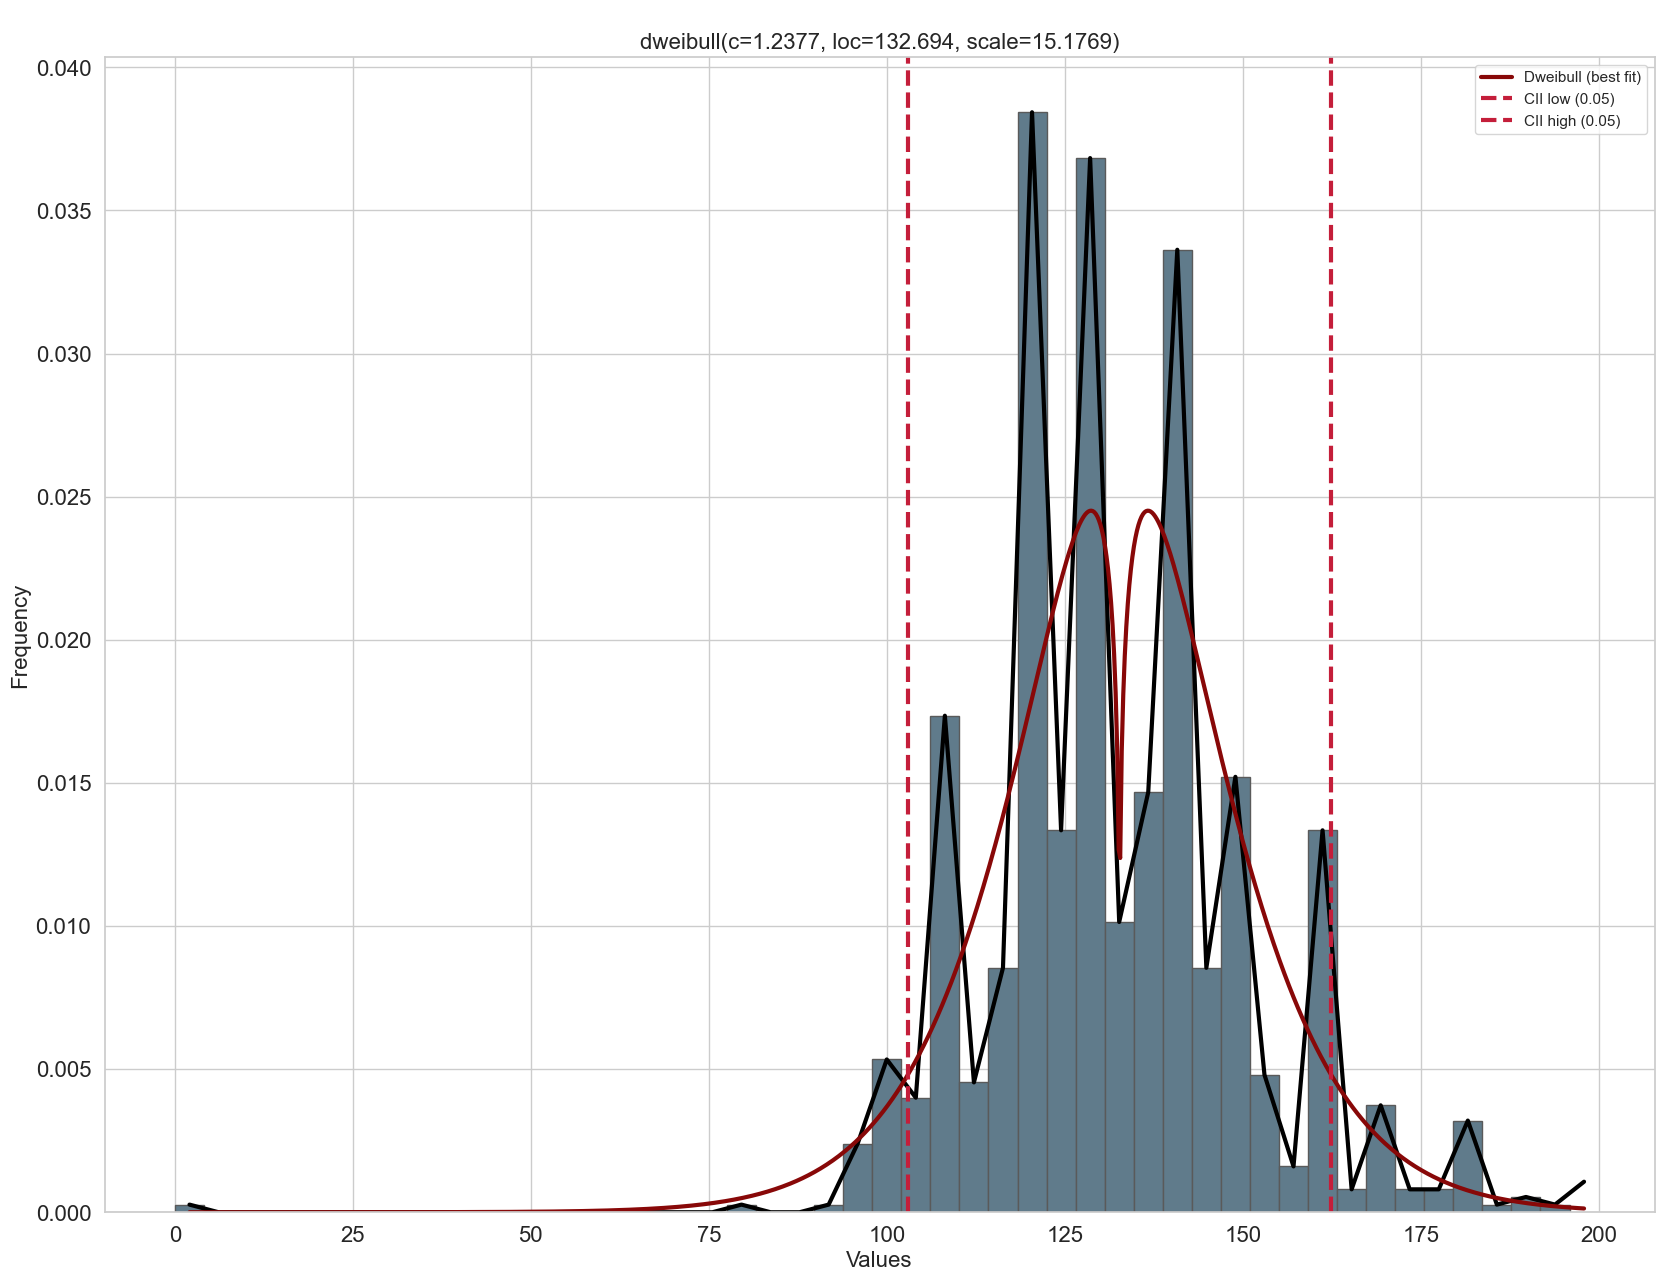

In [21]:
dist = distfit()
dist.fit_transform(heart['RestingBP'])

best_dist_name = dist.model['name']

params = dist.model['params']

dist.plot()
print(best_dist_name)
print(params)

### Cholesterol

Serum cholesterol [mm/dl]. Nivel de colesterol en el suero sanguíneo

In [22]:
fig = px.box(heart, y=["Cholesterol"])


fig.update_traces(boxpoints='all', jitter=0.3, pointpos=-1.8)

fig.update_layout(title="Cholesterol", title_x=0.5)

fig.show()

Vamos a eliminar los datos donde Cholesterol = 0, ya que no es plausible que un sujeto tenga este valor.

In [23]:
heart_filter = heart[heart['Cholesterol'] != 0]


Tras limpiar los registros de colesterol, eliminando aquellos que no eran plausibles, vemos que se ajusta a una curva log-normal.

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 1.71713e-05] [loc=244.635 scale=59.114]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.00025569] [loc=85.000 scale=159.635]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.00025569] [loc=-68719476651.000 scale=68719476736.000]
[distfit] >INFO> [dweibull  ] [0.00 sec] [RSS: 1.2171e-05] [loc=241.572 scale=46.369]
[distfit] >INFO> [t         ] [0.07 sec] [RSS: 1.93079e-05] [loc=245.041 scale=58.946]
[distfit] >INFO> [genextreme] [0.03 sec] [RSS: 8.75841e-06] [loc=219.645 scale=50.692]
[distfit] >INFO> [gamma     ] [0.00 sec] [RSS: 8.37221e-06] [loc=24.450 scale=14.980]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 7.48511e-06] [loc=-41.701 scale=280.669]
[distfit] >INFO> [beta      ] [0.02 sec] [RSS: 5.2008e-05] [loc=84.264 scale=546.154]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.000244936] [loc=85.000 scale=518.000]
[distfit] >INFO> [loggamma  ] [0.01 sec] [RSS: 1.80418e-05] [loc=-18


(0.19880223028236713, -41.700630914579726, 280.6692100953564)


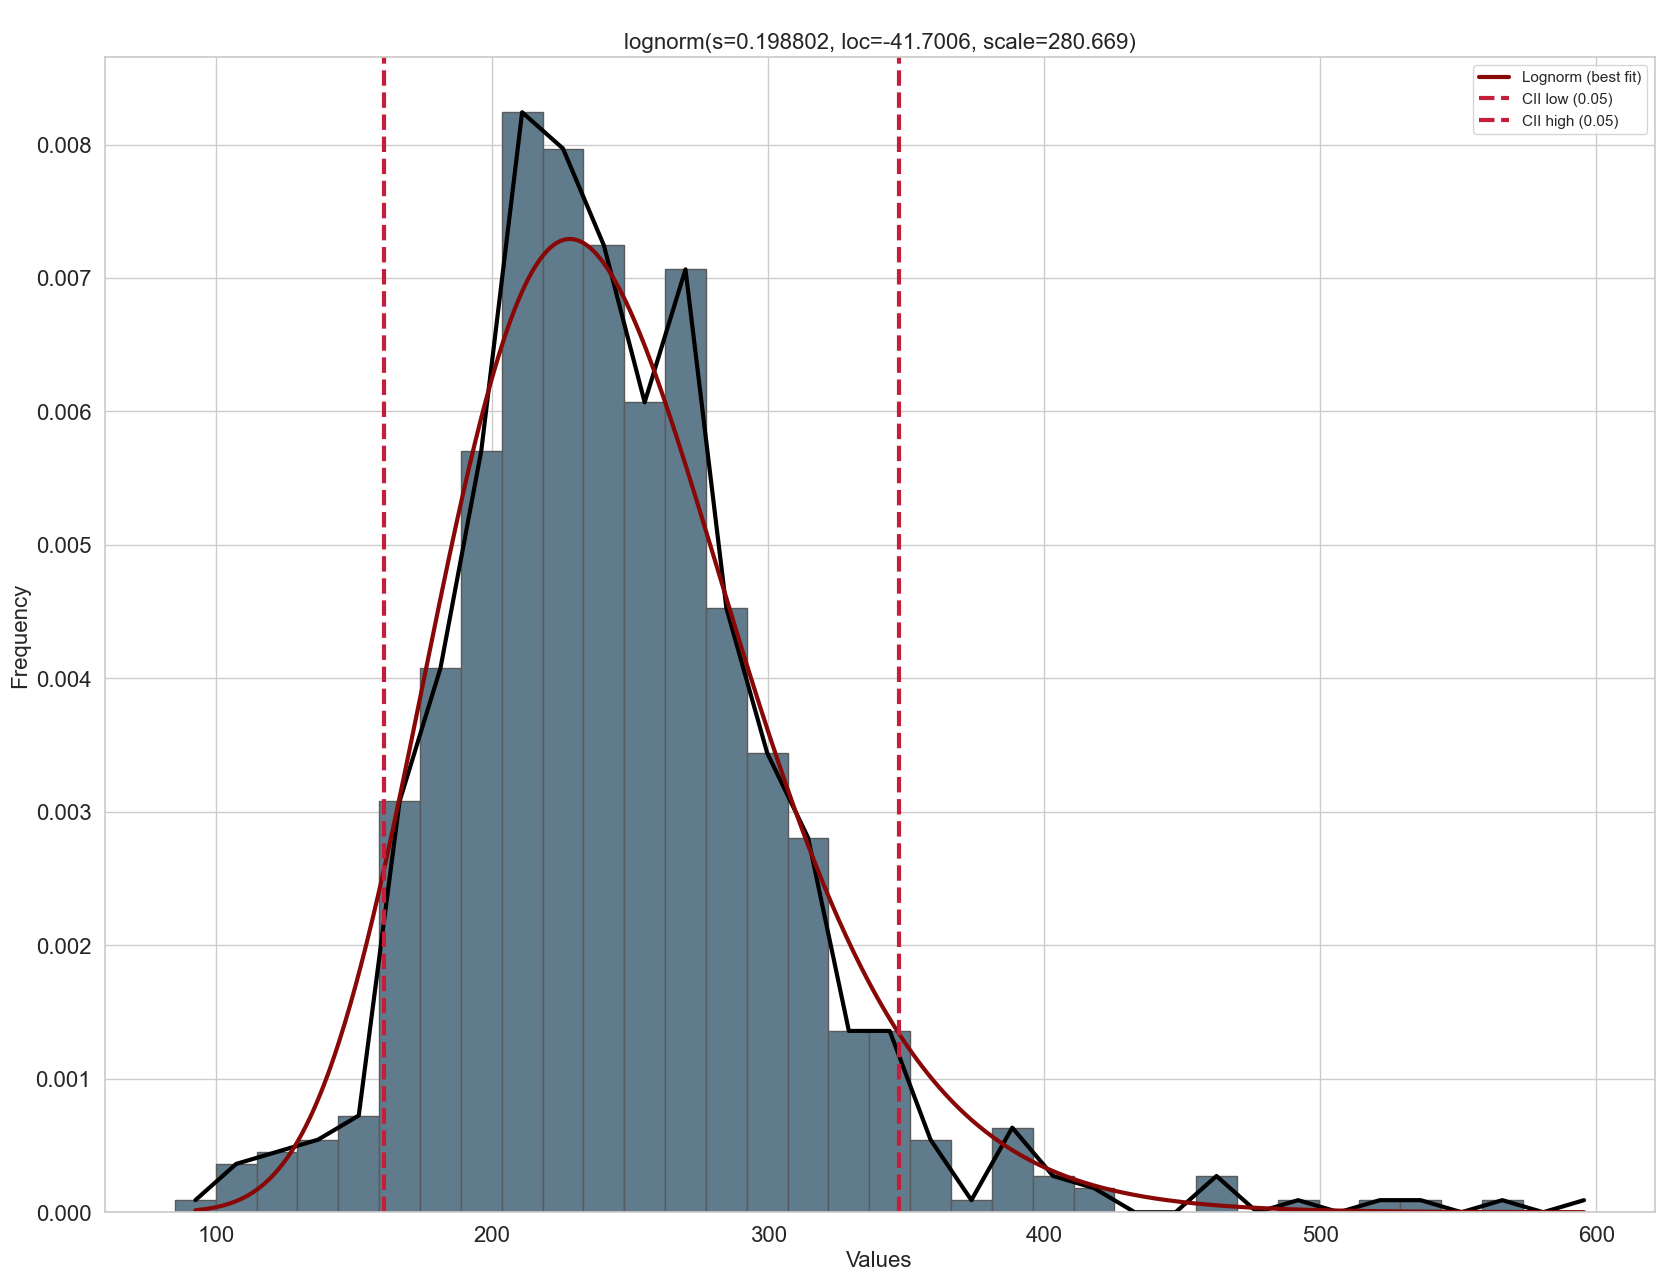

In [24]:

dist = distfit()
dist.fit_transform(heart_filter['Cholesterol'])

best_dist_name = dist.model['name']

params = dist.model['params']

dist.plot()
print()
print(params)

### Curva de densidad de colesterol

La gráfica muestra la distribución de los niveles de colesterol en el suero sanguíneo y su comparación con una distribución normal. La línea amarilla representa la densidad de los niveles de colesterol y la línea punteada indica la media, que es de 244.64. La curva azul punteada es la distribución normal estimada basada en los datos, utilizada para referencia.

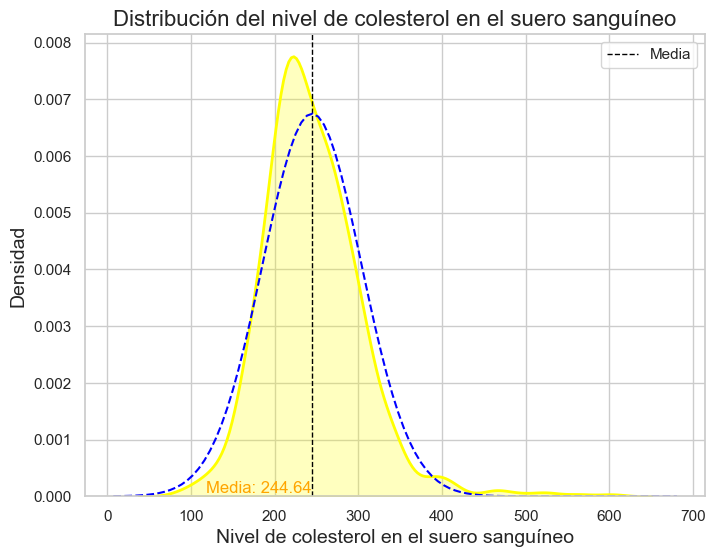

In [25]:

mean_colesterol, desviacion_estandar = norm.fit(heart_filter["Cholesterol"])

# Configuración de estilo usando Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(8, 6))
sns.kdeplot(data=heart_filter["Cholesterol"], fill=True, color='yellow', linewidth=2)

# Agregar línea vertical en la media
plt.axvline(mean_colesterol, color='black', linestyle='dashed', linewidth=1, label='Media')

plt.text(mean_colesterol, 0, f'Media: {mean_colesterol:.2f}', color='orange', verticalalignment='bottom', horizontalalignment='right')

# Configuraciones adicionales para mejorar la estética
plt.title("Distribución del nivel de colesterol en el suero sanguíneo", fontsize=16)
plt.xlabel("Nivel de colesterol en el suero sanguíneo", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.legend()  # Mostrar leyenda con la línea de la media

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_colesterol, desviacion_estandar)
plt.plot(x, p, color='blue', linestyle='--', label='Norm')

plt.show()

### Probabilidad de tener el colesterol óptimo, elevado o alto

In [26]:
media, desviacion_estandar = norm.fit(heart_filter["Cholesterol"])

# Crear una función de densidad de probabilidad para la distribución ajustada
pdf_func = norm.pdf


probabilidad_menor_200 = integrate.quad(pdf_func, -float('inf'), 200, args=(media, desviacion_estandar))[0]
probabilidad_menor_240 = integrate.quad(pdf_func, -float('inf'), 240, args=(media, desviacion_estandar))[0]


display("Segun Elo Heath, Cholesterol categories:")
print(f"La probabilidad de que Cholesterol sea optimal: {round(probabilidad_menor_200 * 100, 2)} %")
print(f"La probabilidad de que Cholesterol sea elevated: {round((probabilidad_menor_240-probabilidad_menor_200) * 100, 2)} %")
print(f"La probabilidad de que Cholesterol sea High: {round((1-probabilidad_menor_240) * 100, 2)} %")

'Segun Elo Heath, Cholesterol categories:'

La probabilidad de que Cholesterol sea optimal: 22.51 %
La probabilidad de que Cholesterol sea elevated: 24.36 %
La probabilidad de que Cholesterol sea High: 53.13 %


### Frecuencia cardíaca máxima

En el boxplot vemos lo siguiente:
- **Mínimo:** 60
- **Límite Inferior:** 67 (los valores por debajo podrían considerarse atípicos)
- **Q1:** 120 (percentil 25)
- **Mediana:** 138 (percentil 50)
- **Q3:** 156 (percentil 75)
- **Límite Superior:** 202 (los valores por encima podrían considerarse atípicos)
- **Máximo:** 202

In [27]:
fig = px.box(heart, y=["MaxHR"])


fig.update_traces(boxpoints='all', jitter=0.3, pointpos=-1.8)

fig.update_layout(title="Maximum heart rate achieved", title_x=0.5)

fig.show()

Dividimos por 2 muestras: los hombres y las mujeres

In [28]:
heart_m = heart[heart['Sex'] == 'M']
heart_f = heart[heart['Sex'] == 'F']

### Heart Rate Hombres

Planteamos una curva normal superpuesta a nuestra curva de densidad para ver cuánto se ajusta a esta.

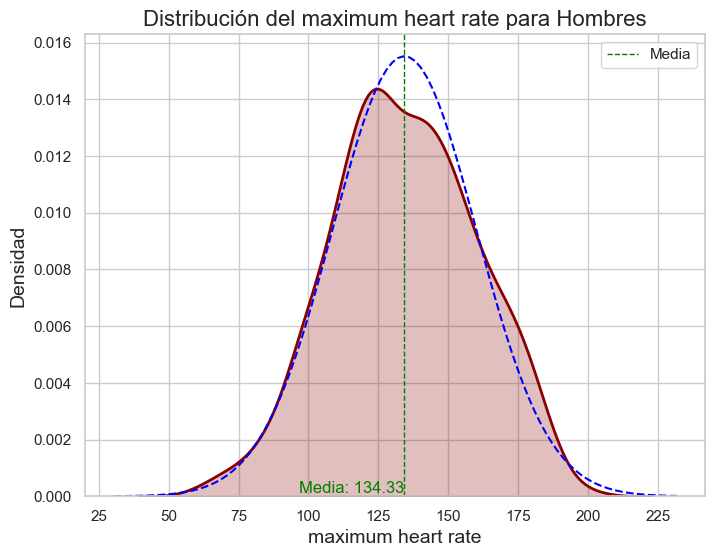

In [29]:

mean_heart_rate, desviacion_estandar = norm.fit(heart_m["MaxHR"])

# Configuración de estilo usando Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(8, 6))
sns.kdeplot(data=heart_m["MaxHR"], fill=True, color='darkred', linewidth=2)

# Agregar línea vertical en la media
plt.axvline(mean_heart_rate, color='green', linestyle='dashed', linewidth=1, label='Media')

plt.text(mean_heart_rate, 0, f'Media: {mean_heart_rate:.2f}', color='green', verticalalignment='bottom', horizontalalignment='right')

# Configuraciones adicionales para mejorar la estética
plt.title("Distribución del maximum heart rate para Hombres", fontsize=16)
plt.xlabel("maximum heart rate", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.legend()  # Mostrar leyenda con la línea de la media

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_heart_rate, desviacion_estandar)
plt.plot(x, p, color='blue', linestyle='--', label='Norm')

plt.show()

Con la comprobación vemos que la distribución de la frecuencia cardíaca en hombres se ajusta a una beta teniendo parámetros de loc=38.76 y scale=176.18.

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 7.79322e-05] [loc=134.326 scale=25.701]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.000976317] [loc=60.000 scale=74.326]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.000976317] [loc=-34359738308.000 scale=34359738368.000]
[distfit] >INFO> [dweibull  ] [0.00 sec] [RSS: 8.42328e-05] [loc=133.471 scale=23.027]
[distfit] >INFO> [t         ] [0.07 sec] [RSS: 7.79345e-05] [loc=134.323 scale=25.701]
[distfit] >INFO> [genextreme] [0.05 sec] [RSS: 0.00170539] [loc=200.585 scale=6.673]
[distfit] >INFO> [gamma     ] [0.01 sec] [RSS: 7.71075e-05] [loc=-1217.481 scale=0.490]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 7.79305e-05] [loc=-1048516.000 scale=1048650.325]
[distfit] >INFO> [beta      ] [0.00 sec] [RSS: 7.49835e-05] [loc=38.761 scale=176.180]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.000556639] [loc=60.000 scale=142.000]
[distfit] >INFO> [loggamma  ] [0.01 sec] [RSS: 7.93105e-

(5.7701521285588, 4.864672250012656, 38.76085928230316, 176.18047918042095)


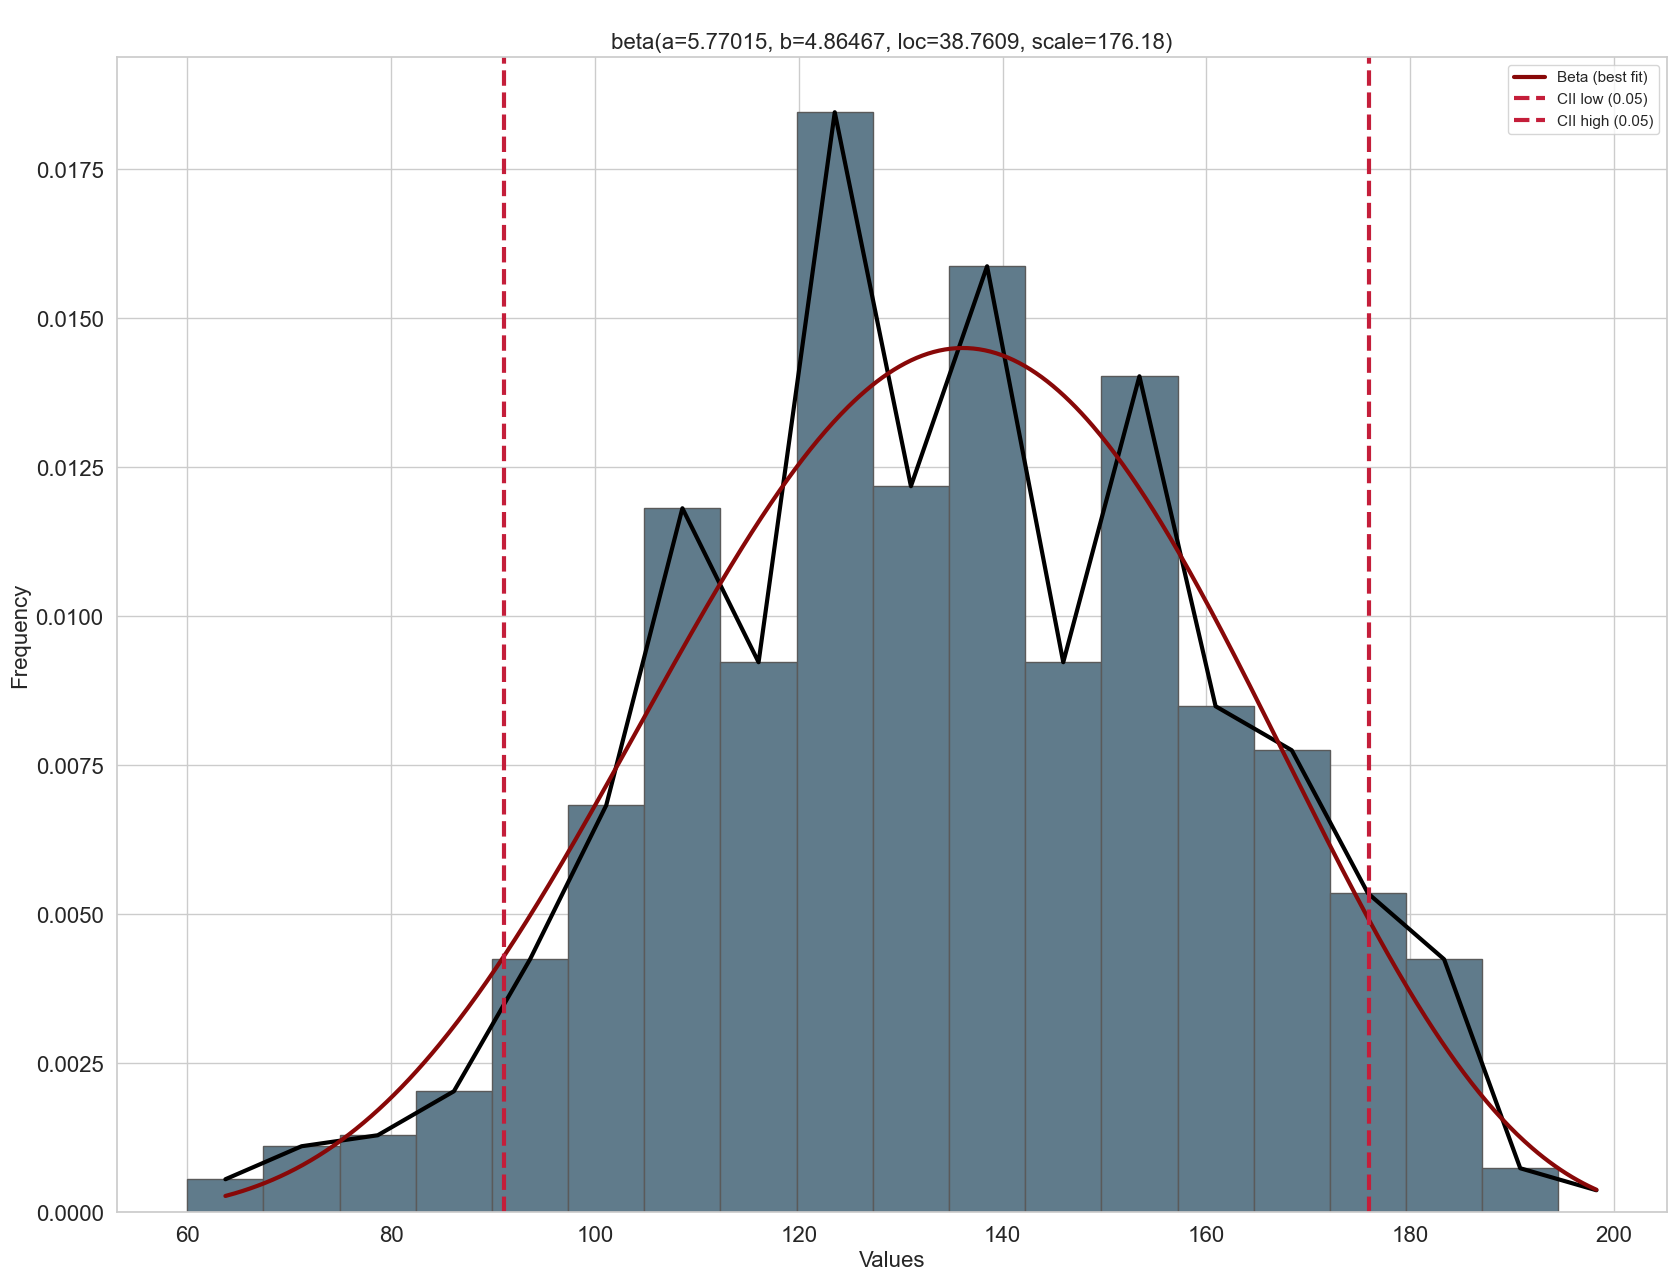

In [30]:
dist = distfit()
dist.fit_transform(heart_m['MaxHR'])

best_dist_name = dist.model['name']

params = dist.model['params']

dist.plot()

print(params)

### Heart Rate Mujeres

Aquí también planteamos una curva norma superpuesta para verificar visualmente si se trataba o no de una curva normal.

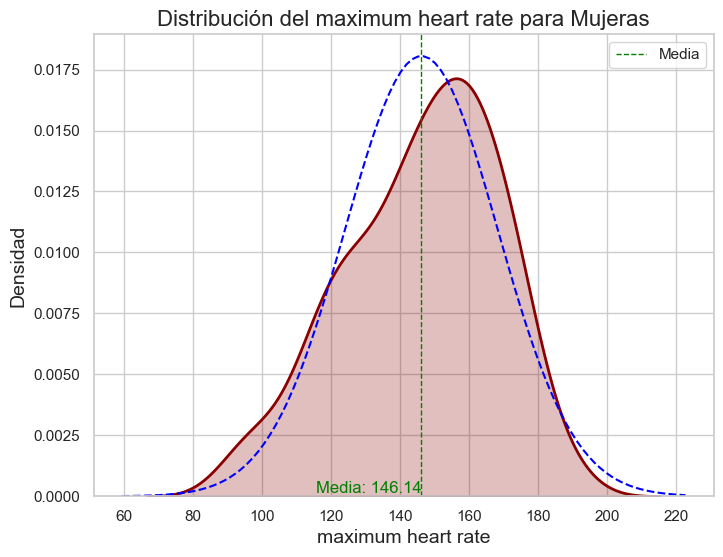

In [31]:

mean_heart_rate, desviacion_estandar = norm.fit(heart_f["MaxHR"])

# Configuración de estilo usando Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(8, 6))
sns.kdeplot(data=heart_f["MaxHR"], fill=True, color='darkred', linewidth=2)

# Agregar línea vertical en la media
plt.axvline(mean_heart_rate, color='green', linestyle='dashed', linewidth=1, label='Media')

plt.text(mean_heart_rate, 0, f'Media: {mean_heart_rate:.2f}', color='green', verticalalignment='bottom', horizontalalignment='right')

# Configuraciones adicionales para mejorar la estética
plt.title("Distribución del maximum heart rate para Mujeras", fontsize=16)
plt.xlabel("maximum heart rate", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.legend()  # Mostrar leyenda con la línea de la media

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_heart_rate, desviacion_estandar)
plt.plot(x, p, color='blue', linestyle='--', label='Norm')

plt.show()

Pero haciendo la comprobación de los datos vemos que la curva que más se ajusta a nuestra distribución es la Beta, con unos parámetros de loc=59.529 y scale=136.510.

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 6.60759e-05] [loc=146.140 scale=22.097]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.000629236] [loc=90.000 scale=56.140]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.000629236] [loc=-17179869094.000 scale=17179869184.000]
[distfit] >INFO> [dweibull  ] [0.00 sec] [RSS: 6.72207e-05] [loc=146.767 scale=19.940]
[distfit] >INFO> [t         ] [0.06 sec] [RSS: 6.6052e-05] [loc=146.141 scale=22.099]
[distfit] >INFO> [genextreme] [0.04 sec] [RSS: 0.00100896] [loc=190.115 scale=7.624]
[distfit] >INFO> [gamma     ] [0.01 sec] [RSS: 7.23546e-05] [loc=-247.887 scale=1.300]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 6.6077e-05] [loc=-4476939.313 scale=4477085.453]
[distfit] >INFO> [beta      ] [0.01 sec] [RSS: 2.09499e-05] [loc=59.529 scale=136.510]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.000256294] [loc=90.000 scale=102.000]
[distfit] >INFO> [loggamma  ] [0.00 sec] [RSS: 3.48144e-05]

(5.058772227876538, 2.920650448564019, 59.52880310691411, 136.50985212811116)


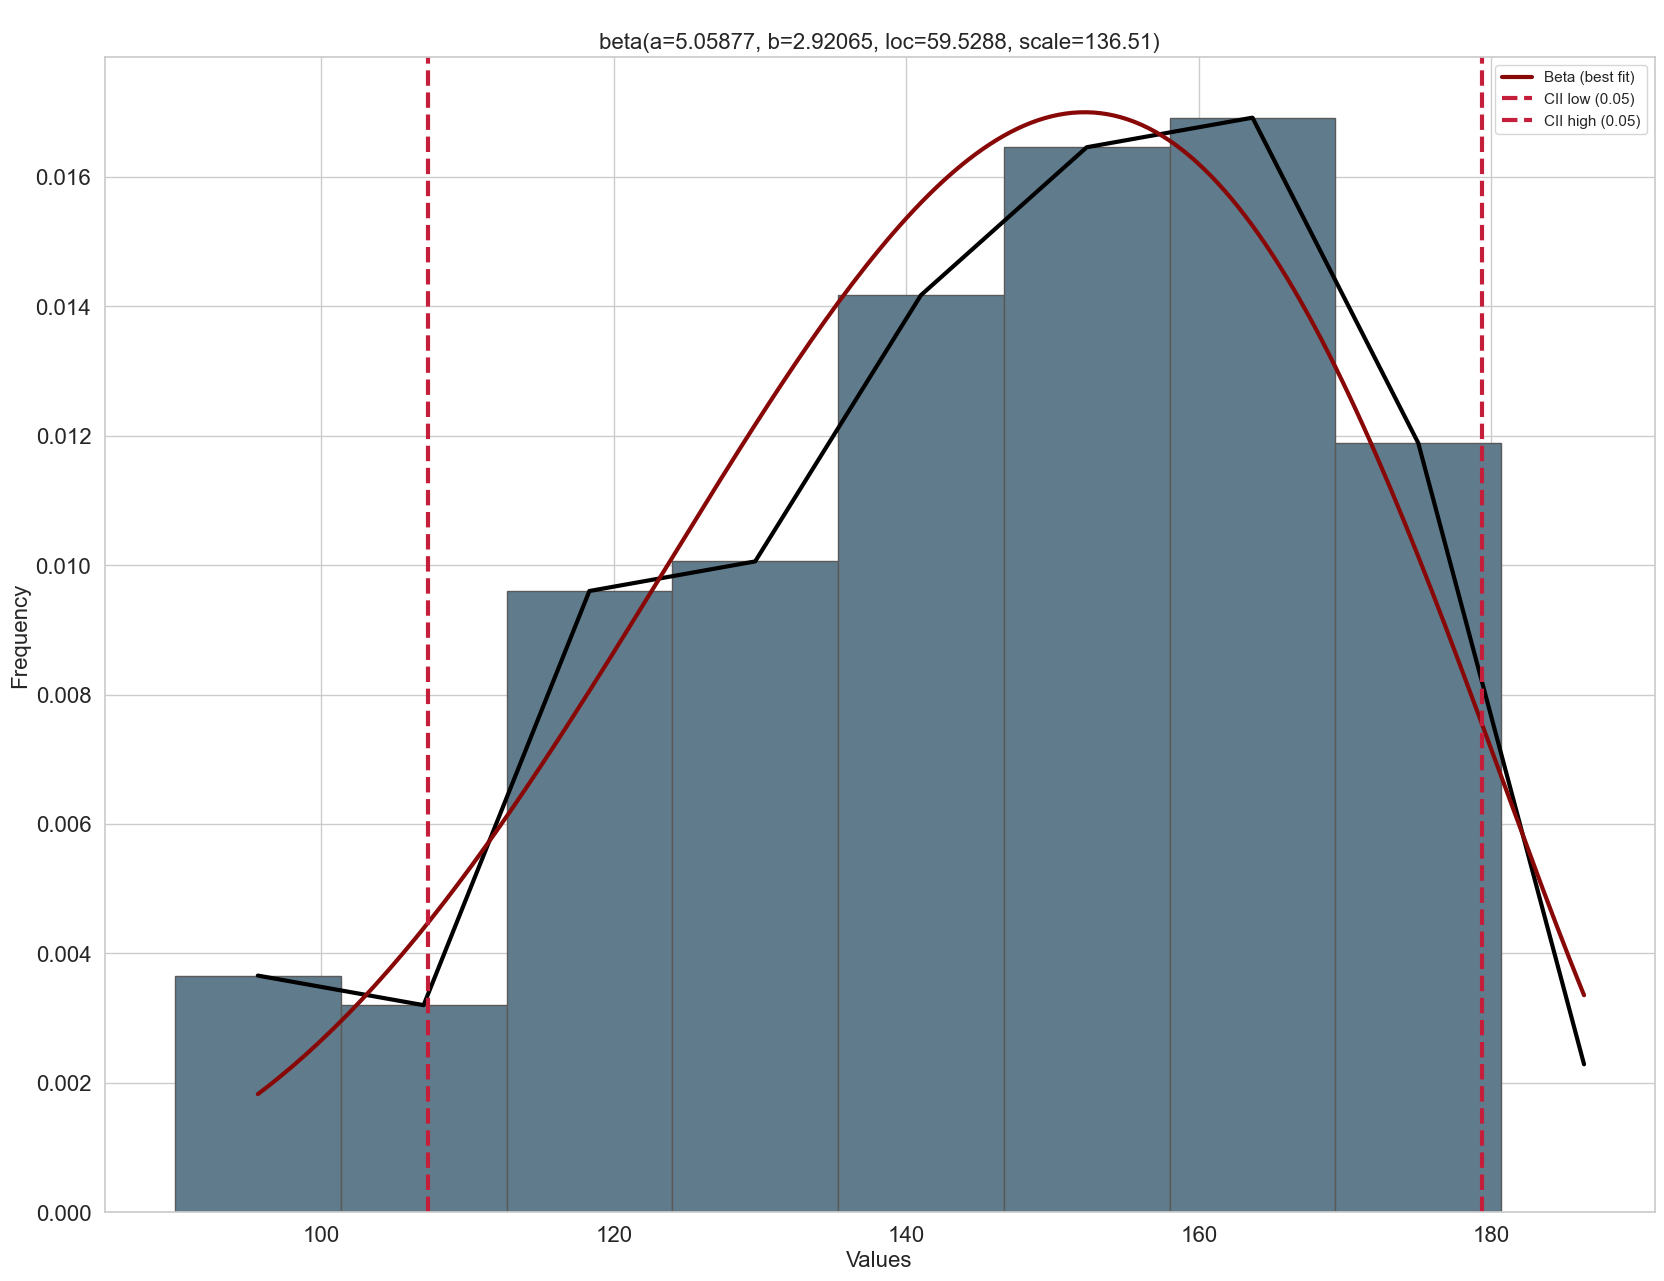

In [32]:
dist = distfit()
dist.fit_transform(heart_f['MaxHR'])

best_dist_name = dist.model['name']

params = dist.model['params']

dist.plot()

print(params)

### Distribución del ritmo cardíaco máximo

Vemos una distribución extraña con 2 picos, lo que nos podría indicar que hay 2 grupos con distribuciones diferentes que convendría explorar.

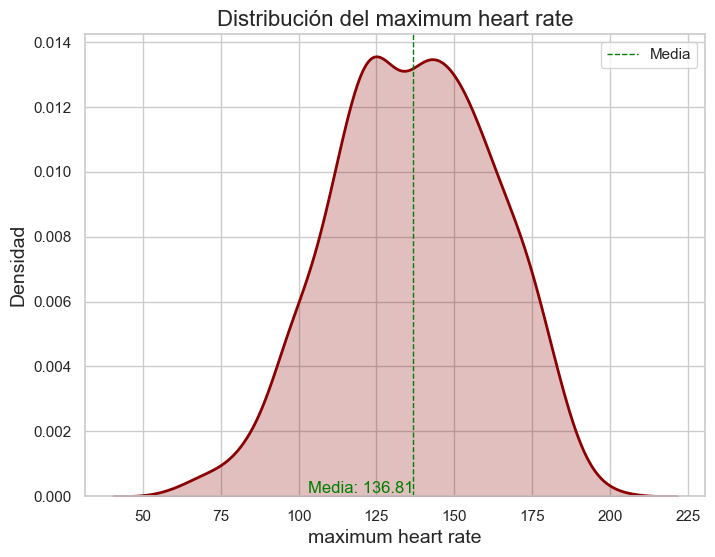

In [33]:
mean_MaxHR = heart["MaxHR"].mean()

# Configuración de estilo usando Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(8, 6))
sns.kdeplot(data=heart["MaxHR"], fill=True, color='darkred', linewidth=2)

# Agregar línea vertical en la media
plt.axvline(mean_MaxHR, color='green', linestyle='dashed', linewidth=1, label='Media')

plt.text(mean_MaxHR, 0, f'Media: {mean_MaxHR:.2f}', color='green', verticalalignment='bottom', horizontalalignment='right')

# Configuraciones adicionales para mejorar la estética
plt.title("Distribución del maximum heart rate", fontsize=16)
plt.xlabel("maximum heart rate", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.legend()  # Mostrar leyenda con la línea de la media
plt.show()

Para explorarla probamos a separar por sexo. Al hacerlo vemos como los que antes eran dos picos ahora son dos grupos, uno de hombres y otro de mujeres con frecuencias cardíacas máximas diferentes. Los hombres tienen de media 134,33 pulsaciones por minuto mientras que las mujeres tienen una media de 146,14.

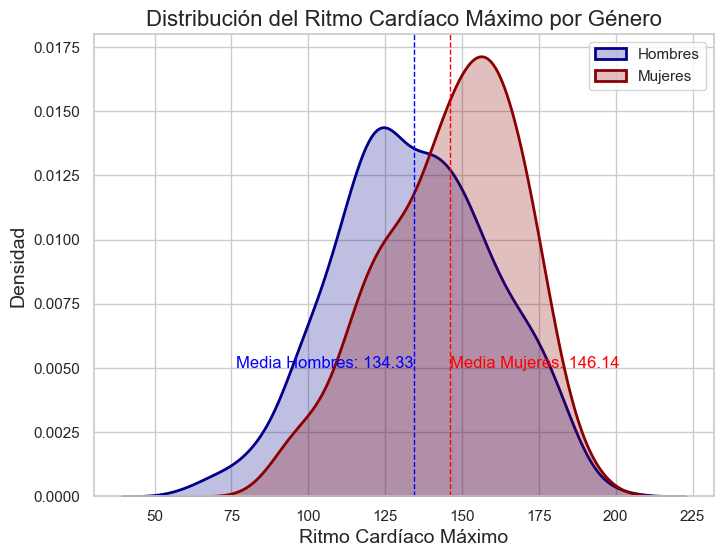

In [34]:
# Calcular la media de MaxHR para cada género
mean_MaxHR_M = heart[heart["Sex"] == 'M']["MaxHR"].mean()
mean_MaxHR_F = heart[heart["Sex"] == 'F']["MaxHR"].mean()

# Configuración de estilo usando Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de densidad para hombres
plt.figure(figsize=(8, 6))
sns.kdeplot(data=heart[heart["Sex"] == 'M']["MaxHR"], fill=True, color='darkblue', linewidth=2, label='Hombres')

# Agregar línea vertical en la media para hombres
plt.axvline(mean_MaxHR_M, color='blue', linestyle='dashed', linewidth=1)
plt.text(mean_MaxHR_M, 0.005, f'Media Hombres: {mean_MaxHR_M:.2f}', color='blue', ha='right')

# Crear el gráfico de densidad para mujeres
sns.kdeplot(data=heart[heart["Sex"] == 'F']["MaxHR"], fill=True, color='darkred', linewidth=2, label='Mujeres')

# Agregar línea vertical en la media para mujeres
plt.axvline(mean_MaxHR_F, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_MaxHR_F, 0.005, f'Media Mujeres: {mean_MaxHR_F:.2f}', color='red', ha='left')

# Configuraciones adicionales para mejorar la estética
plt.title("Distribución del Ritmo Cardíaco Máximo por Género", fontsize=16)
plt.xlabel("Ritmo Cardíaco Máximo", fontsize=14)
plt.ylabel("Densidad", fontsize=14)
plt.legend()  # Mostrar leyenda
plt.show()

### Variables categoricas

In [35]:
chestpaintype = pd.crosstab(index=heart['ChestPainType'], columns='count')

In [36]:
HeartDisease = pd.crosstab(index=heart['HeartDisease'], columns='count')

El 55% de los sujetos tenía una enfermedad cardíaca diagnosticada, mientras que el 45% restante no.

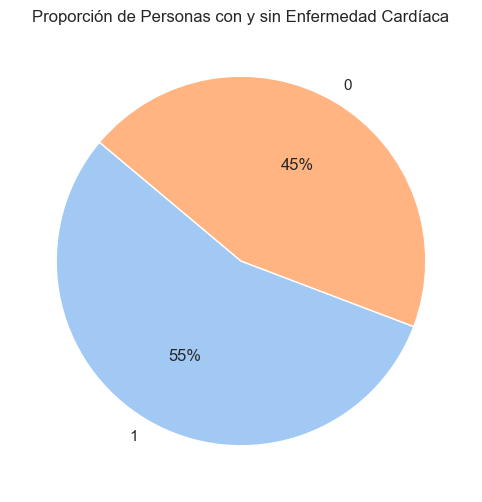

In [37]:
# Contar la cantidad de personas con y sin enfermedad cardíaca
heart_disease_counts = heart['HeartDisease'].value_counts()

# Convertir el índice a string para coherencia
heart_disease_counts.index = heart_disease_counts.index.map(str)

# Datos para el gráfico
heart_values = heart_disease_counts.values
labels = heart_disease_counts.index

# Definir la paleta de colores a utilizar
colors = sns.color_palette('pastel')[0:2]

# Crear el gráfico circular
plt.figure(figsize=(8, 6))
plt.pie(heart_values, labels = labels, colors = colors, autopct='%.0f%%', startangle=140)
plt.title('Proporción de Personas con y sin Enfermedad Cardíaca')
plt.show()

### Correlaciones

En la siguiente imagen vemos las correlaciones que podrían haber entre los distintos factores recogidos. Vemos como la única que podría tener algo de correlación es una negativa entre frecuencia cardíaca máxima y edad, queriendo decir que la frecuencia cardíaca tiende a disminuir a medida que aumenta la edad. Pero es una correlación débil.

In [38]:
df_numeric = heart_n.apply(pd.to_numeric, errors='coerce')
df_numeric = df_numeric.drop(['Sex','ChestPainType','ChestPainType', 'RestingECG','ExerciseAngina', 'ST_Slope' ], axis=1)

correlation_matrix = df_numeric.corr()


fig = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                  x=correlation_matrix.columns.tolist(),
                                  y=correlation_matrix.columns.tolist(),
                                  colorscale='Viridis')


fig.update_layout(title='Correlation Heatmap',
                  xaxis=dict(title='Features'),
                  yaxis=dict(title='Features'))


fig.show()

## Realización de contrastes de hipótesis

#### Edad y enfermedad cardíaca

Para comenzar a analizar si hay relación entre edad y enfermedad cardíaca empezamos visualizando las distribuciones de edad con y sin angina de pecho.

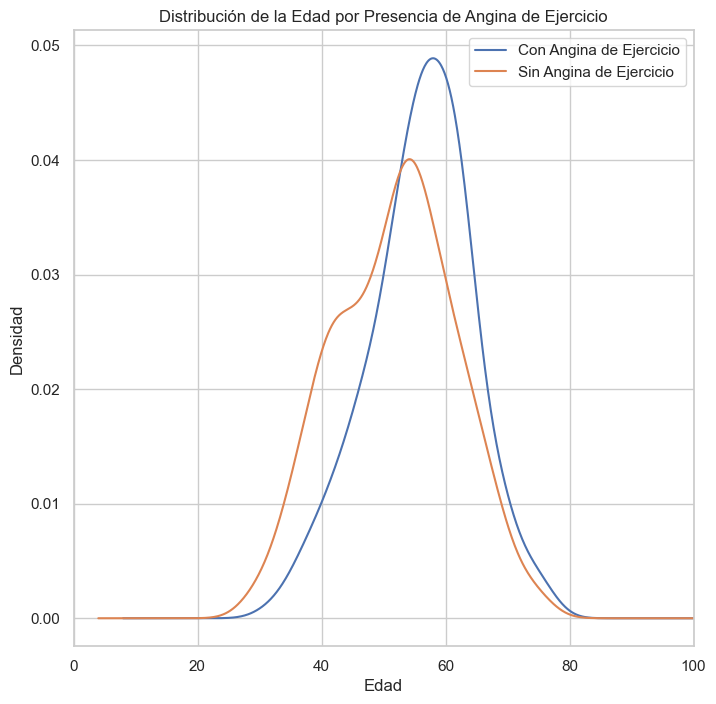

In [39]:
# Filtrar los datos para personas con angina inducida por ejercicio
age_with_angina = heart[heart['ExerciseAngina'] == 'Y']['Age']

# Filtrar los datos para personas sin angina inducida por ejercicio
age_without_angina = heart[heart['ExerciseAngina'] == 'N']['Age']

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 8))

# Crear el gráfico de densidad para personas con angina de ejercicio
age_with_angina.plot(kind="density", label='Con Angina de Ejercicio', xlim=(0, 100))

# Crear el gráfico de densidad para personas sin angina de ejercicio
age_without_angina.plot(kind="density", label='Sin Angina de Ejercicio', xlim=(0, 100))

# Mostrar la leyenda y los títulos del gráfico
plt.legend()
plt.title('Distribución de la Edad por Presencia de Angina de Ejercicio')
plt.xlabel('Edad')
plt.ylabel('Densidad')

# Mostrar el gráfico
plt.show()

Los resultados muestran que, con un 95% de confianza, la media de maxHR para hombres está entre aproximadamente 132.45 y 136.20 y para mujeres entre 143.02 y 149.26. Estos intervalos no se superponen, lo que sugiere que hay una diferencia estadísticamente significativa en la frecuencia cardíaca máxima entre hombres y mujeres.

In [40]:
mean_MaxHR_M, std_MaxHR_M = stats.norm.fit(heart[heart["Sex"] == 'M']["MaxHR"])
mean_MaxHR_F, std_MaxHR_F = stats.norm.fit(heart[heart["Sex"] == 'F']["MaxHR"])

print(f'Intervalo de confianza maxHR de hombres:{stats.norm.interval(confidence=0.95,loc=mean_MaxHR_M,scale=std_MaxHR_M/math.sqrt(725))}')
print(f'Intervalo de confianza maxHR de mujeres:{stats.norm.interval(confidence=0.95,loc=mean_MaxHR_F,scale=std_MaxHR_F/math.sqrt(193))}')


Intervalo de confianza maxHR de hombres:(132.45467716562197, 136.19635731713666)
Intervalo de confianza maxHR de mujeres:(143.0223620883411, 149.25743065777286)


In [41]:
mean_age, std_MaxHR_M = stats.norm.fit(heart["Age"])
mean_age

53.510893246187365

## Primer contraste de hipotesis es:

H0 - la edad media de los mujeres sea igual al media de la edad global

H1 - la edad media de los mujeres sea differentes al media de la edad global

In [42]:
stats.ttest_1samp(a=heart[heart["Sex"] == 'F']["Age"], popmean=mean_age)

TtestResult(statistic=-1.4869043366772654, pvalue=0.13868041035602144, df=192)

#### Conclusion

Aceptamos la hipotesis nula de que las mujeres tienen la misma edad que de la media.

## Segundo contraste de hipotesis: 

H0 - la media de edad de las mujeres y los homnres es la misma

H1 - la media de edad de las mujeres y los homnres es la differente

In [43]:
hombres_age = heart[heart["Sex"] == 'M']["Age"]
mujeres_age = heart[heart["Sex"] == 'F']["Age"]

In [44]:
# Levene test
# ==============================================================================
levene_test_age = stats.levene(hombres_age, mujeres_age, center='median')
levene_test_age

LeveneResult(statistic=0.18959835581305062, pvalue=0.6633536927055659)

In [45]:
stats.ttest_ind(a= hombres_age,
                b= mujeres_age,
                equal_var=True)

TtestResult(statistic=1.6899324360928314, pvalue=0.0913811394506423, df=916.0)

#### Conclusion

Aceptamos la hipostesis nula al 95% pero no al 90%.

## Tercer contraste de hipotisis: 


H0 - la media de MaxHR entre hombres y mujeres es la misma. 95%

H1- la media de MaxHR entre hombres y mujeres es la differente. 95%

In [46]:
hombres = heart[heart["Sex"] == 'M']["MaxHR"]
mujeres = heart[heart["Sex"] == 'F']["MaxHR"]

In [47]:
# Levene test
# ==============================================================================
levene_test = stats.levene(hombres, mujeres, center='median')
levene_test

LeveneResult(statistic=6.718013973745109, pvalue=0.009696346554858388)

In [48]:
stats.ttest_ind(a= hombres,
                b= mujeres,
                equal_var=False)

TtestResult(statistic=-6.355498690994117, pvalue=6.621308873934913e-10, df=342.77246943460193)

### Conclusión

Rechazamos la hipótesis nula -H0- que postula que no hay diferencia en las medias de la frecuencia cardíaca máxima entre hombres y mujeres.

Por lo tanto, aceptamos la hipótesis alternativa -H1-, que afirma que hay una diferencia significativa en las medias de frecuencia cardíaca máxima entre hombres y mujeres en el conjunto de datos analizado.

## Cuarta hipotesis, es:

H0 -  la misma maxHR para enfermos y no enfermos

H1 - maxHR para enfermos y no enfermos es diferente

In [49]:
heart['HeartDisease'] = heart['HeartDisease'].astype(str)

In [50]:
enfermedad = heart[heart["HeartDisease"] == '1']["MaxHR"]
sano = heart[heart["HeartDisease"] == '0']["MaxHR"]

In [51]:
levene_test = stats.levene(enfermedad, sano, center='median')
levene_test

LeveneResult(statistic=0.015283704333272613, pvalue=0.901637513061787)

In [52]:
stats.ttest_ind(a= enfermedad,
                b= sano,
                equal_var=True)

TtestResult(statistic=-13.22548998290478, pvalue=1.1377859840278095e-36, df=916.0)

#### Conclusion

Rechazamos la hipostesis nula de que la frecuencia cardiaca máxima es la misma para los enfermos y los no enfermos.

Aceptamos, por lo tanto, la hipótesis -H1- de que la frecuencia cardíaca es diferente.

## Quinta hipotesis es: 

H0 - media maxHR sanos menos  o igual que maxHR de enfermos

H1 - media maxHR sanos mas que maxHR de enfemos

In [53]:
stats.ttest_ind(a= sano,
                b= enfermedad,
                alternative='greater',
                equal_var=True)

TtestResult(statistic=13.22548998290478, pvalue=5.6889299201390475e-37, df=916.0)

#### Conclusion

Los enfermos tienen unas pulsaciones maximas mayores que los sanos.

## Realización de ANOVA

In [54]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Chest Pain Group

In [55]:
TA_cholesterol = heart_filter.loc[heart_filter['ChestPainType'] == 'TA', ['Cholesterol']]
ATA_cholesterol = heart_filter.loc[heart_filter['ChestPainType'] == 'ATA', ['Cholesterol']]
NAP_cholesterol = heart_filter.loc[heart_filter['ChestPainType'] == 'NAP', ['Cholesterol']]
ASY_cholesterol = heart_filter.loc[heart_filter['ChestPainType'] == 'ASY', ['Cholesterol']]


## Test de normalidad

TA

In [56]:
stat, p = shapiro(TA_cholesterol)


print("Statistic:", stat)
print("p-value:", p)


alpha = 0.05
if p > alpha:
    print("Los datos parecen seguir una distribución normal (no hemos podido rechazar la hipótesis nula).")
else:
    print("Los datos no parecen seguir una distribución normal (rechazamos la hipótesis nula)")


Statistic: 0.9804616584132216
p-value: 0.6930182609279538
Los datos parecen seguir una distribución normal (no hemos podido rechazar la hipótesis nula).


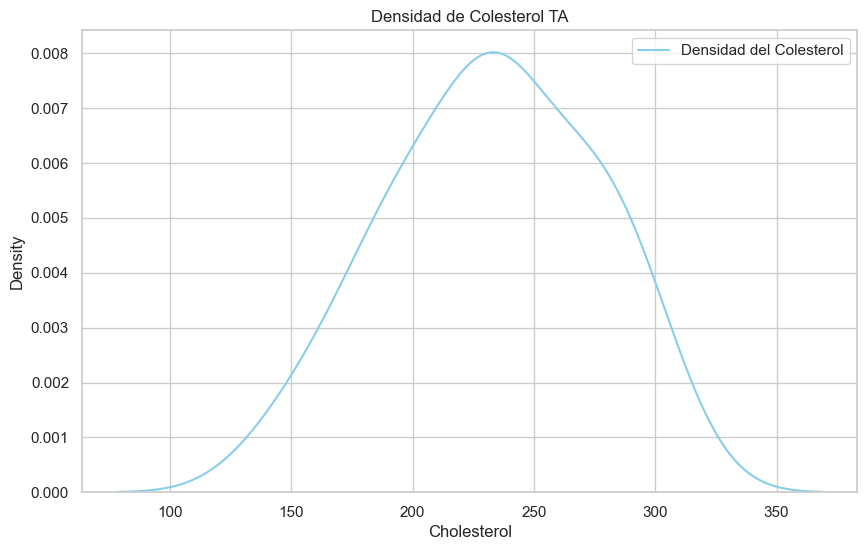

In [57]:
# Crear una figura
plt.figure(figsize=(10, 6))

# Graficar la densidad de distribución
sns.kdeplot(TA_cholesterol['Cholesterol'], color='skyblue', label='Densidad del Colesterol')



# Añadir título y etiquetas
plt.title('Densidad de Colesterol TA')
plt.xlabel('Cholesterol')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


<Axes: xlabel='Cholesterol'>

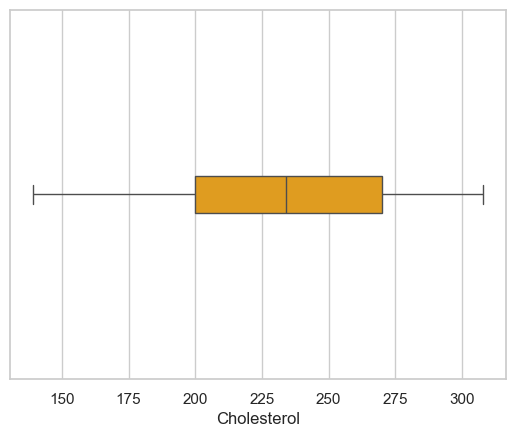

In [58]:
# Graficar el box plot
sns.boxplot(x=TA_cholesterol['Cholesterol'], color='orange', width=0.1)

ATA

In [59]:
stat, p = shapiro(ATA_cholesterol)


print("Statistic:", stat)
print("p-value:", p)


alpha = 0.05
if p > alpha:
    print("Los datos parecen seguir una distribución normal (no hemos podido rechazar la hipótesis nula).")
else:
    print("Los datos no parecen seguir una distribución normal (rechazamos la hipótesis nula)")

Statistic: 0.9698359837083578
p-value: 0.001106808949508915
Los datos no parecen seguir una distribución normal (rechazamos la hipótesis nula)


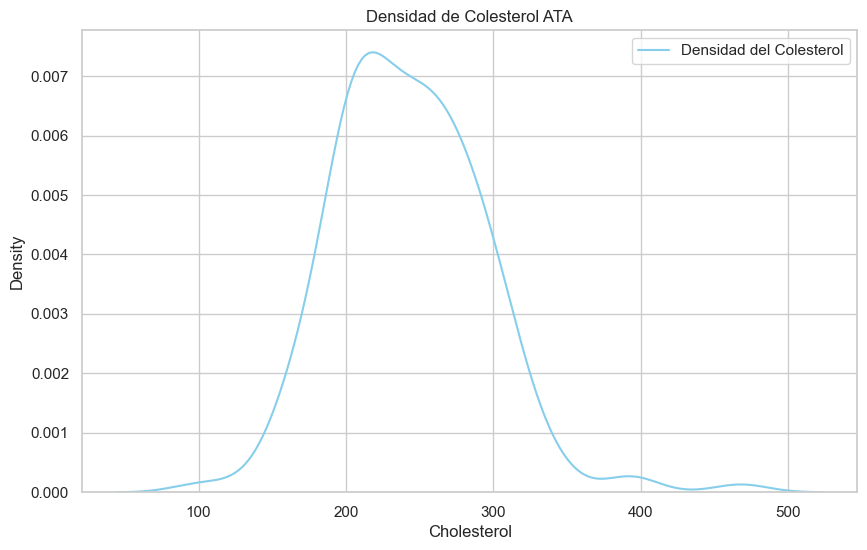

In [60]:
# Crear una figura
plt.figure(figsize=(10, 6))

# Graficar la densidad de distribución
sns.kdeplot(ATA_cholesterol['Cholesterol'], color='skyblue', label='Densidad del Colesterol')



# Añadir título y etiquetas
plt.title('Densidad de Colesterol ATA')
plt.xlabel('Cholesterol')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


<Axes: xlabel='Cholesterol'>

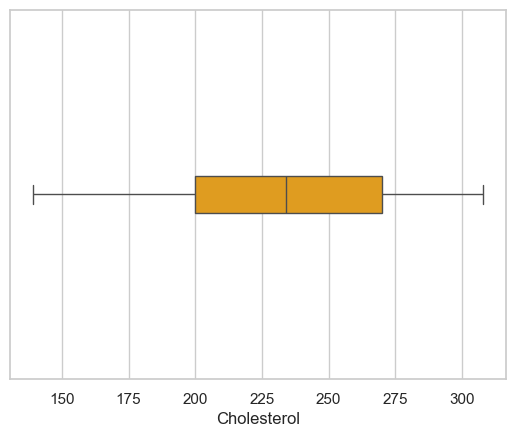

In [61]:
# Graficar el box plot
sns.boxplot(x=TA_cholesterol['Cholesterol'], color='orange', width=0.1)

NAP

In [62]:
stat, p = shapiro(NAP_cholesterol)


print("Statistic:", stat)
print("p-value:", p)


alpha = 0.05
if p > alpha:
    print("Los datos parecen seguir una distribución normal (no hemos podido rechazar la hipótesis nula).")
else:
    print("Los datos no parecen seguir una distribución normal (rechazamos la hipótesis nula)")

Statistic: 0.8821318943526077
p-value: 2.699521489039477e-10
Los datos no parecen seguir una distribución normal (rechazamos la hipótesis nula)


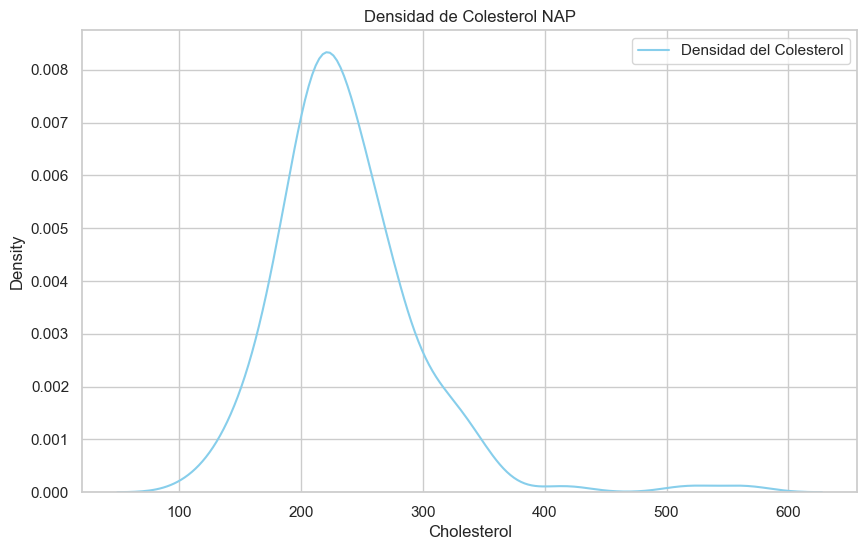

In [63]:
# Crear una figura
plt.figure(figsize=(10, 6))

# Graficar la densidad de distribución
sns.kdeplot(NAP_cholesterol['Cholesterol'], color='skyblue', label='Densidad del Colesterol')



# Añadir título y etiquetas
plt.title('Densidad de Colesterol NAP')
plt.xlabel('Cholesterol')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

<Axes: xlabel='Cholesterol'>

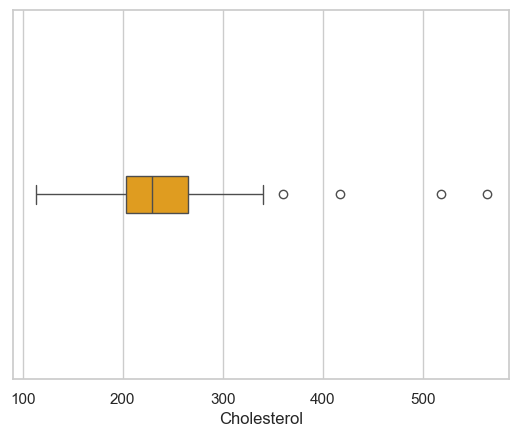

In [64]:
# Graficar el box plot
sns.boxplot(x=NAP_cholesterol['Cholesterol'], color='orange', width=0.1)

ASY

In [65]:
stat, p = shapiro(ASY_cholesterol)


print("Statistic:", stat)
print("p-value:", p)


alpha = 0.05
if p > alpha:
    print("Los datos parecen seguir una distribución normal (no hemos podido rechazar la hipótesis nula).")
else:
    print("Los datos no parecen seguir una distribución normal (rechazamos la hipótesis nula)")


Statistic: 0.9429533291993193
p-value: 9.83480493012536e-11
Los datos no parecen seguir una distribución normal (rechazamos la hipótesis nula)


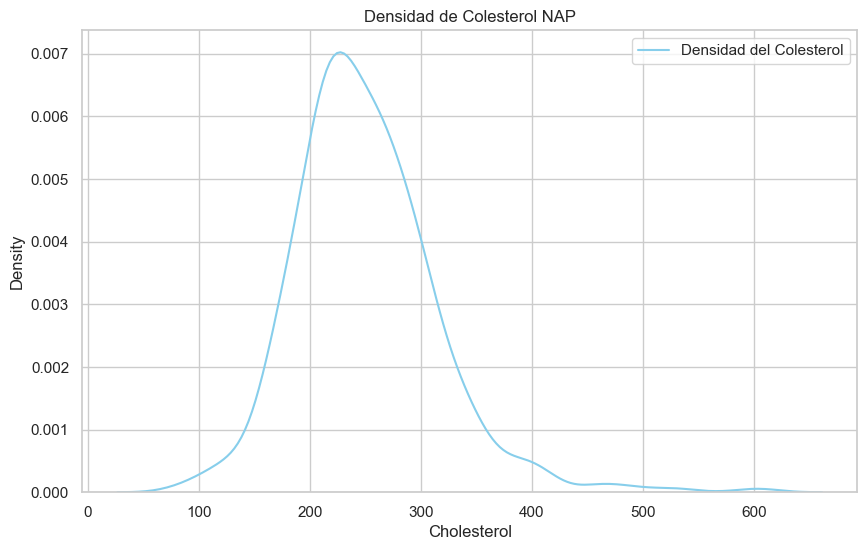

In [66]:

# Crear una figura
plt.figure(figsize=(10, 6))

# Graficar la densidad de distribución
sns.kdeplot(ASY_cholesterol['Cholesterol'], color='skyblue', label='Densidad del Colesterol')



# Añadir título y etiquetas
plt.title('Densidad de Colesterol NAP')
plt.xlabel('Cholesterol')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

<Axes: xlabel='Cholesterol'>

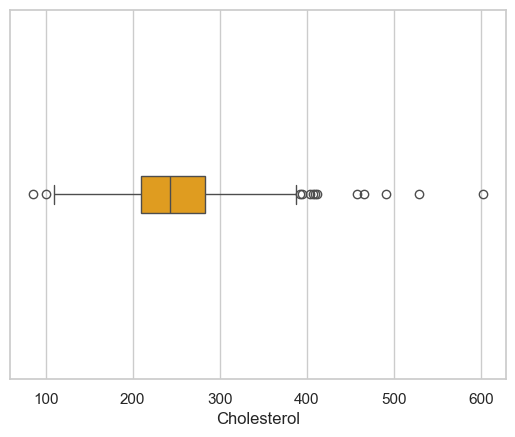

In [67]:
# Graficar el box plot
sns.boxplot(x=ASY_cholesterol['Cholesterol'], color='orange', width=0.1)

### Test de igualdad de varianzas

En el análisis de los niveles de colesterol entre distintos tipos de dolor de pecho (TA, ATA, NAP, ASY), se aplicó la prueba de Levene para evaluar la homogeneidad de las varianzas con el centro en la mediana. El estadístico de prueba fue de aproximadamente 2.38, con un valor p de 0.069. Dado que el valor p supera el umbral convencional de 0.05, no se encontraron diferencias significativas en las varianzas de los niveles de colesterol entre los grupos. Esto indica que, desde el punto de vista de la variabilidad del colesterol, los diferentes tipos de dolor de pecho se comportan de manera similar, lo que nos permite seguir adelante con un ANOVA.

In [68]:
# Levene test
# ==============================================================================
levene_test_cholesterol = stats.levene(TA_cholesterol, ATA_cholesterol,NAP_cholesterol, ASY_cholesterol , center='median')
levene_test_cholesterol

LeveneResult(statistic=array([2.37879983]), pvalue=array([0.06856199]))

In [69]:
cholesterol_data = pd.concat([TA_cholesterol, ATA_cholesterol, NAP_cholesterol, ASY_cholesterol],
                             keys=['TA', 'ATA', 'NAP', 'ASY'], names=['ChestPainType'])
# Concatenamos los datos en un solo DataFrame
cholesterol_data['ChestPainType'] = cholesterol_data.index.get_level_values(0)

# Creamos el box plot utilizando Plotly
fig = px.box(cholesterol_data, x='ChestPainType', y='Cholesterol', title='Box Plot para diferentes tipos de dolor en el pecho y niveles de colesterol')

# Habilitamos las etiquetas de valores al pasar el cursor sobre el gráfico
fig.update_traces(boxpoints='all', jitter=0.3, pointpos=-1.8, hoverinfo='y')

# Mostramos el gráfico
fig.show()

### ANOVA (Análisis de la varianza)

Realizamos un análisis de varianza (ANOVA) para explorar cómo los niveles de colesterol varían con el tipo de dolor de pecho. Al encontrar un valor p menor a 0.05, descubrimos que realmente existen diferencias significativas en los niveles de colesterol entre los diferentes tipos de dolor de pecho, indicando que el tipo de dolor influye en los niveles de colesterol.

Este resultado nos llevó a profundizar más mediante la prueba post-hoc de Tukey. Esta nos permitió comparar los grupos entre sí de manera detallada, asegurando que no aumentáramos por error las posibilidades de encontrar diferencias donde no las hay. Gracias a esto podremos identificar qué tipos de dolor de pecho tienen niveles de colesterol significativamente diferentes, si es que los hay.

In [70]:
model = ols('Cholesterol ~ ChestPainType',                 
            data = heart_filter).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                     sum_sq     df         F    PR(>F)
ChestPainType  2.766053e+04    3.0  2.652518  0.047683
Residual       2.579198e+06  742.0       NaN       NaN


### Prueba de Tukey

Los resultados de la prueba de Tukey HSD indican comparaciones entre medias de niveles de colesterol para diferentes tipos de dolor de pecho (ASY, ATA, NAP, TA). Ninguna de las diferencias entre grupos alcanzó significancia estadística, como se refleja en los valores "p-adj" superiores a 0.05. Esto sugiere que, aunque hay variaciones en las medias de colesterol entre los tipos de dolor de pecho, estas no son estadísticamente significativas dentro del nivel de confianza del 95%. En resumen, con base en estos resultados, **no hay evidencia suficiente para afirmar que existen diferencias significativas en los niveles de colesterol entre los distintos tipos de dolor de pecho estudiados.**

In [71]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizamos la prueba de Tukey
tukey = pairwise_tukeyhsd(endog=heart_filter['Cholesterol'],     # Datos
                          groups=heart_filter['ChestPainType'],  # Grupos
                          alpha=0.05)                             # Nivel de significancia

# Mostramos los resultados
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   ASY    ATA  -7.3319 0.5433 -21.5134  6.8496  False
   ASY    NAP -13.0456 0.0812   -27.14  1.0487  False
   ASY     TA -17.8883 0.2539 -42.8758  7.0992  False
   ATA    NAP  -5.7137 0.8117 -22.3027 10.8752  False
   ATA     TA -10.5564 0.7338 -37.0313 15.9184  False
   NAP     TA  -4.8427 0.9652  -31.271 21.5856  False
-----------------------------------------------------
